Enter the label option (W for Week, Q for Quarter, M for Month, Y for Year): m
Selected label option: M
Enter the name of the Gantt chart: test


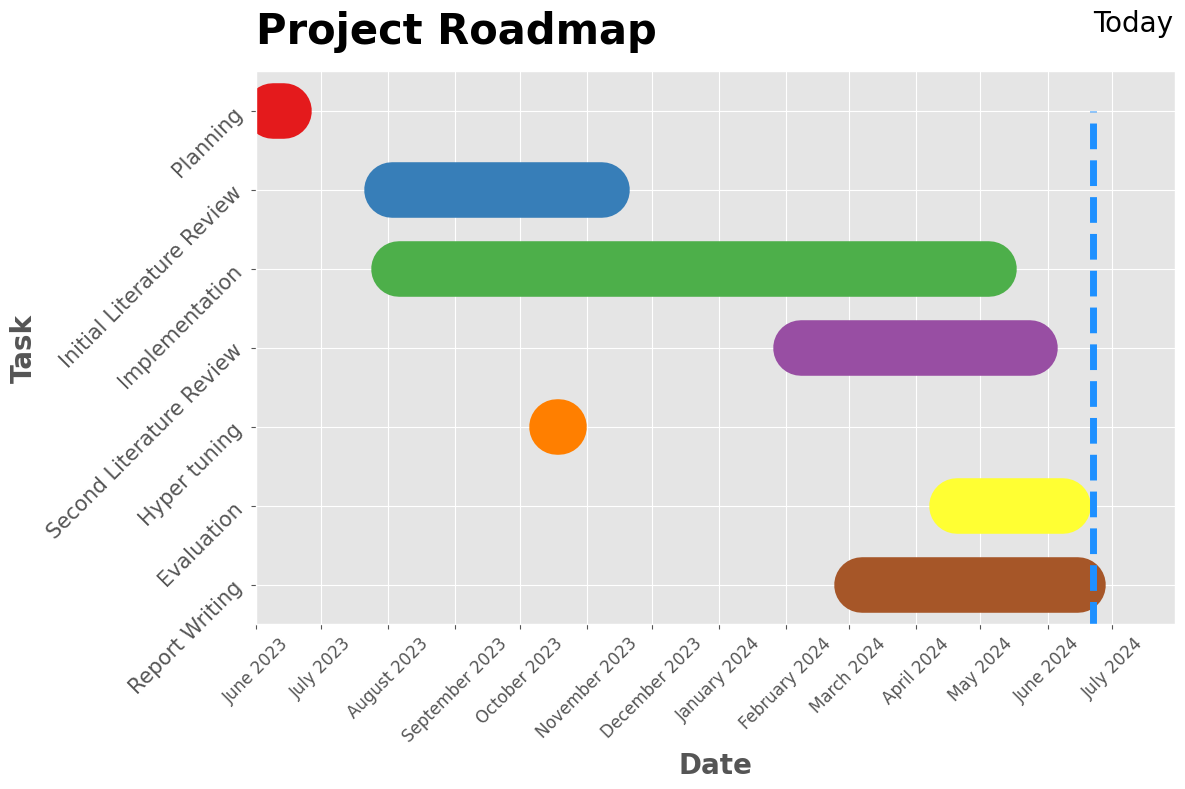

In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
# Define empty variables
df = pd.DataFrame()  # empty DataFrame for storing task data
df_copy = pd.DataFrame()
filename = ""  # empty string for storing the filename
start_date_range = None  # None value for storing the start date range
end_date_range = None  # None value for storing the end date range
task = None

task =["Planning", "Initial Literature Review", "Implementation", "Second Literature Review", "Hyper tuning", "Evaluation", "Report Writing"]
start_date =  ["2023-06-09","2023-08-03", "2023-08-06","2024-02-08","2023-10-18","2024-04-20","2024-03-07"]
end_date =    ["2023-06-14","2023-11-08","2024-05-05","2024-05-24","2023-10-19","2024-06-08","2024-06-15"]

df = pd.DataFrame(data={"Task": task, "Start": start_date, "End": end_date})

df["Start"] = pd.to_datetime(df.Start)
df["End"] =   pd.to_datetime(df.End)

df["Days"] = df["End"] - df["Start"]
df["Color"] = plt.cm.Set1.colors[:len(df)]
df


# make a copy of the origianl DataFrame for the first plot to not destory the original for nely  generated polts
df_copy = df.copy()

# setings for the plot
#Lables Option:
#label_freq = "W" #gives weekly labels,
#label_freq = "M" #gives monthly labels,
#label_freq = "Q" #gives quarterly labels,
#label_freq = "Y" #gives yearly labels.
label_option = input("Enter the label option (W for Week, Q for Quarter, M for Month, Y for Year): ")

if label_option.lower() == "w":
    label = "W"
elif label_option.lower() == "q":
    label = "Q"
elif label_option.lower() == "m":
    label = "M"
elif label_option.lower() == "y":
    label = "Y"
else:
    print("Invalid input. Using default label option.")
    label = "M"  # default label option

print("Selected label option:", label)

label_freq = label

# Get valid filename from user
filename = input("Enter the name of the Gantt chart: ")
if filename == "":
    print("Error: empty filename specified. Using default name.")
    now = datetime.now()
    default_filename = 'GanttChart_' + now.strftime('%Y-%m-%d_%H-%M-%S') + '.pdf'
    print("Default filename:", default_filename)
    filename = default_filename


# Returns the current local date
today = date.today()

#getting number of tasks to use in the table
unique_tasks = df_copy["Task"].unique()[::-1]
num_tasks = len(unique_tasks)

plt.style.use("ggplot")

intervals = {
    "W": {
        "freq": "1W",
        "label": lambda dt: f"Week {dt.isocalendar()[1]}, {dt.year}"
    },
    "M": {
        "freq": "1MS",
        "label": lambda dt: dt.strftime("%B %Y")
    },
    "Q": {
        "freq": "3MS",
        "label": lambda dt: f"Q{dt.quarter} {dt.year}"
    },
    "Y": {
        "freq": "1AS",
        "label": lambda dt: f"{dt.year}"
    }
}

if label_freq not in intervals:
    raise ValueError("Invalid interval format")

interval_info = intervals[label_freq]

# logic for dynamic chart
# Calculate the difference between start and end dates
delta = df_copy['End'].max() - df_copy['Start'].min()

# Adjust the frequency of x-tick labels based on time period
if delta.days <= 30:  # less than or equal to 30 days
    freq = "1W"  # weekly labels
elif delta.days <= 365:  # less than or equal to 1 year
    freq = interval_info["freq"]  # monthly labels
elif delta.days <= 365*2:  # less than or equal to 2 years
    freq = interval_info["freq"]  # quarterly labels
else:  # more than 2 years
    freq = interval_info["freq"]  # biannual labels

fig, ax = plt.subplots(figsize=(12,8))

plt.hlines(y=range(num_tasks), xmin=df_copy["Start"][::-1], xmax=df_copy["End"][::-1], color=df_copy["Color"][::-1],
          linewidth=40, capstyle="round")

plt.vlines(x=today, ymin=-1, ymax=num_tasks-1, color="dodgerblue", linewidth=5.0,linestyle="dashed")
plt.text(x=today, y=num_tasks, s="Today", fontsize=20, color="black")

dt_rng = pd.date_range(start="2023-6-1", end="2024-7-30", freq=freq)
labels = [interval_info["label"](dt) for dt in dt_rng]
ax.set_xticks(dt_rng)
ax.set_xticklabels(labels, fontsize=12, rotation=45)

plt.xlabel("Date", fontsize=20, fontweight="bold")
plt.ylabel("Task", fontsize=20, fontweight="bold")
plt.title("Project Roadmap", loc="left", pad=20, fontsize=30, fontweight="bold")
plt.yticks(range(num_tasks), unique_tasks, fontsize=15,rotation=45 )
ax.set_xlim([date(2023,6,1), date(2024,7,30)])
ax.set_ylim([-0.5, num_tasks-0.5])

# Add task durations as bar labels
# nead som more work to be added
#for i, bar in enumerate(bars):
#    w, h = bar.get_width(), bar.get_height()
#    plt.gca().text(w/2+start_dates[i], bar.get_y()+h/2,
#                   str(int(durations[i])) + " days", ha='center', va='center')


fig.subplots_adjust(bottom=0.2, right=0.9, top=0.90, left=0.2)

# Set the title and save the figure as a PDF
#plt.title('Gantt Chart: ' + filename)
plt.tight_layout()
plt.savefig(filename + '.pdf')
plt.show()